In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

### Simulating an $L=10^6$ genome 

In [4]:
# We define a function to generate a random sequence of nucleotide with a fixed length

# X: alphabet of four nucleotides
# L: length of the sequence
# p: probability of occurrence of each nucleotide

# This is the space of possible nucleotides
X = ["A","T","C","G"]

def get_sequence(X,L,p):
    
    s = np.random.choice(X, 
              size=L, 
              replace=True, 
              p=p)
    
    return s

In [5]:
# Genome size
L = 10**6

# Probability of each nucleotide for a low-complexity genome  (entropy is small)
# p = [0.9,0.1/3,0.1/3,0.1/3]

# Probability of each nucleotide for a high-complexity genome (entropy is large)
p = [1/4,1/4,1/4,1/4]

# Generate the genome
G = get_sequence(X,L,p)

In [10]:
# inpsect the genome
G

array(['T', 'A', 'G', ..., 'C', 'A', 'C'], dtype='<U1')

In [11]:
def get_occurrence(M,G):
    
    # M: motif, a numpy array of nucleotides
    # G: genome, a numpy array of nucleotides
    
    # the length of the motif within this function
    l = np.size(M)
    
    # compare the first nucleotide from the motif against the entire genome
    index_G_matched = np.where(M[0] == G)[0]
    
    for i in np.arange(1,l):

        # possible positions on the genome for the next comparison
        index_tmp = (index_G_matched + 1)[(index_G_matched + 1) <= (L-1)]

        # nucleotides from those positions in the genome
        G_subset = G[index_tmp]

        # compare the next nucleotide in the motif against those genomic nucleotides
        index_G_matched = index_tmp[np.where(M[i] == G_subset)[0]]
        
    return np.size(index_G_matched)


In [14]:
# Motif size
l = 8  

# Probability of each nucleotide for low-complexity motifs
# p = [0.7,0.1,0.1,0.1]

# Probability of each nucleotide for high-complexity motifs
p = [1/4,1/4,1/4,1/4]

# Generate the motif
M = get_sequence(X,l,p)

In [15]:
# inspect the motif
M

array(['G', 'A', 'G', 'C', 'C', 'G', 'G', 'G'], dtype='<U1')

In [16]:
# you can also join nucleotides into a string using this:
# but it might crash a small-memory computer if sequence is very long

''.join(M)

'GAGCCGGG'

In [17]:
# inpsect the number of occurrence for a given motif and a genome
get_occurrence(M,G)

13

#### Next we simulate many different motifs of the same length, and with many different choices of length

For sequences where all four nucleotides appear independently with probability $1/4$,
$$
\mathrm{Critical\;motif\;length}\approx \frac{1}{2}\log_2L
$$

In [20]:
# Generate many motifs for each possible length

# Probability of each nucleotide for low-complexity motifs
# p = [0.7,0.1,0.1,0.1]

# Probability of each nucleotide for high-complexity motifs
p = [1/4,1/4,1/4,1/4]

l_range = np.arange(1,20,3) # choices of l (l=1,4,7,...)

N = 200 # simulate 200 motifs for each motif length (l)

counts_all = [] # storing outputs

for l in l_range:
    counts = []
    for k in range(N):
        M = get_sequence(X,l,p)
        counts.append(get_occurrence(M,G))
    counts_all.append(counts)
    
counts_all = np.array(counts_all)

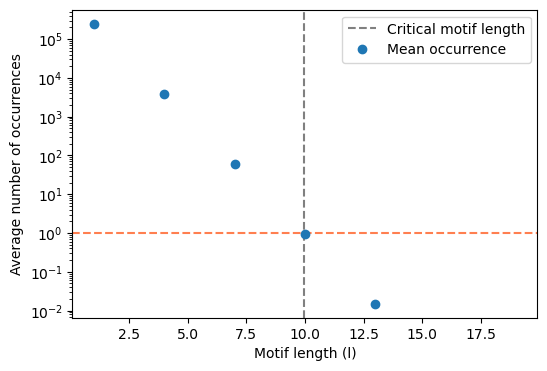

In [21]:
mean_occurrence = np.mean(counts_all,axis=1)

fig, axes = plt.subplots(1,1)
fig.set_figwidth(6)
fig.set_figheight(4)

axes.axhline(1,linestyle='dashed',color='coral')
axes.axvline(np.log2(L)/2,linestyle='dashed',color='gray',label='Critical motif length')
axes.plot(l_range,mean_occurrence,'o',label='Mean occurrence')
axes.set_xlabel('Motif length (l)')
axes.set_ylabel('Average number of occurrences')
axes.set_yscale('log')
axes.legend(loc = 'upper right')

fig